In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils


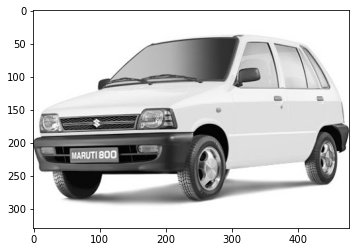

In [2]:
img = cv2.imread('image7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

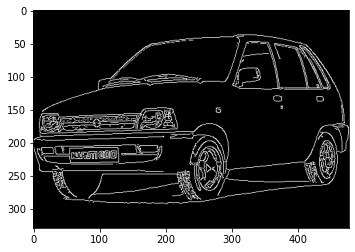

In [15]:
bfilter = cv2.bilateralFilter(gray, 11, 18, 18) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [16]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [17]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [18]:
location

array([[[317,  38]],

       [[287, 108]],

       [[ 98, 119]],

       [[180,  50]]], dtype=int32)

In [19]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-2)
new_image = cv2.bitwise_and(img, img, mask=mask)

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type


In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2, y1:y2]

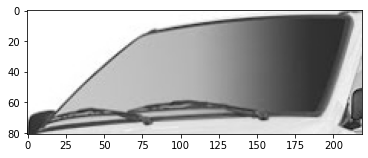

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [11]:
import easyocr

In [12]:
reader = easyocr.Reader(['en'])
res = reader.readtext(cropped_image)
res

[]

In [13]:
text=''
for i in range(len(res)):
    text+=res[len(res)-i-1][1]

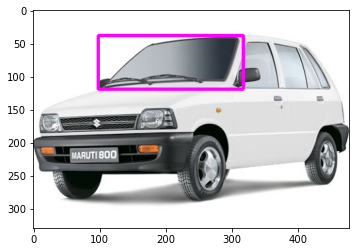

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (255,0,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))